In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [76]:
from PIL import Image
from sklearn.model_selection import train_test_split

In [77]:
folders = ['bottom_left', 'bottom_right', 'bottom_middle', 'top_left', 'top_right', 'top_middle', 'left_middle', 'right_middle']

In [78]:
os.listdir('bottom_left')

['Screenshot 2023-06-26 090713.png',
 'Screenshot 2023-06-26 090721.png',
 'Screenshot 2023-06-26 090728.png',
 'Screenshot 2023-06-26 090737.png',
 'Screenshot 2023-06-26 090744.png',
 'Screenshot 2023-06-26 090751.png',
 'Screenshot 2023-06-26 090802.png']

In [79]:
import cv2

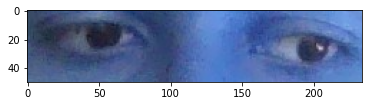

In [80]:
img = cv2.imread(f'bottom_left/{os.listdir("bottom_left")[0]}')
plt.imshow(img)

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Processing 
Resize the image 
convert the image to numpy array

In [82]:
list1 = []
data = []
augmented_data = []
augmented_data_labels = []

# Iterate over the folders and load the images
for i, folder in enumerate(folders):
    for files in os.listdir(folder):
        img = cv2.imread(f'{folder}/{files}')
        img = cv2.resize(img, (250, 50))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        list1.append(i)

        # # Apply data augmentation
        # img_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
        #                                    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
        # augmented_images = img_generator.flow(np.expand_dims(img, axis=0), batch_size=1)

        # # Save the augmented images
        # for j in range(5):  # Generate 5 augmented images per original image
        #     augmented_img = augmented_images.next()[0].astype(np.uint8)
        #     augmented_data.append(augmented_img)
        #     augmented_data_labels.append(i)

In [83]:
# plt.imshow(augmented_data[])

In [84]:
len(data), len(augmented_data)

(67, 0)

In [85]:
# add augmented_data_label to list1
list1.extend(augmented_data_labels)
len(list1), list1


(67,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7])

In [86]:
data.extend(augmented_data)

In [87]:
len(data)

67

In [88]:
list1 = np.array(list1)
list1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7])

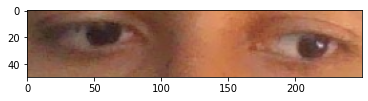

In [89]:
plt.imshow(data[0])

In [90]:
len(data), len(list1)

(67, 67)

In [91]:
list1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7])

# convert the image list to numpy array

In [92]:
data = np.array(data)

In [93]:
data.shape

(67, 50, 250, 3)

In [94]:
data = data/255

In [95]:
data

array([[[[0.38431373, 0.29019608, 0.24313725],
         [0.37254902, 0.28235294, 0.22352941],
         [0.38823529, 0.29411765, 0.23529412],
         ...,
         [0.83921569, 0.58823529, 0.44313725],
         [0.83529412, 0.59215686, 0.44313725],
         [0.82352941, 0.58039216, 0.43137255]],

        [[0.39215686, 0.29803922, 0.24705882],
         [0.37254902, 0.28235294, 0.22352941],
         [0.38431373, 0.29411765, 0.22745098],
         ...,
         [0.83137255, 0.58039216, 0.42745098],
         [0.84313725, 0.59215686, 0.43921569],
         [0.85490196, 0.61176471, 0.45490196]],

        [[0.4       , 0.30980392, 0.24705882],
         [0.4       , 0.30588235, 0.23921569],
         [0.39607843, 0.29411765, 0.22745098],
         ...,
         [0.83529412, 0.57254902, 0.42352941],
         [0.83529412, 0.57647059, 0.42352941],
         [0.83137255, 0.58039216, 0.42745098]],

        ...,

        [[0.56470588, 0.42352941, 0.31764706],
         [0.56078431, 0.41568627, 0.31372549]

In [96]:
# import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, list1, test_size=0.2, random_state=42)

In [97]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((53, 50, 250, 3), (14, 50, 250, 3), (53,), (14,))

# Building the convolution Neural Network(CNN)

In [98]:
import tensorflow as tf
from tensorflow import keras

In [99]:
num_class = len(folders)
num_class

8

In [100]:
x_train.shape[1:]

(50, 250, 3)

In [101]:
model = keras.Sequential()
# Adding the first CNN layers
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
# Adding the second layer with maxpooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


# Adding the third layer
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Adding the fourth layer with maxpooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Adding the flatten layer
model.add(keras.layers.Flatten())
# Adding the first dense layer
# units = 128 is the number of neurons
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))



model.add(keras.layers.Dense(units=64, activation='relu'))

# Add the second dense layer (output layer)
model.add(keras.layers.Dense(units=num_class, activation='softmax'))

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 248, 32)       896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 124, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 122, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 42944)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Training the CNN

In [103]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30


2/2 [==============================] - 3s 687ms/step - loss: 2.2038 - accuracy: 0.0943 - val_loss: 2.0390 - val_accuracy: 0.1429
Epoch 2/30
2/2 [==============================] - 1s 360ms/step - loss: 2.1157 - accuracy: 0.1509 - val_loss: 2.0337 - val_accuracy: 0.1429
Epoch 3/30
2/2 [==============================] - 1s 449ms/step - loss: 2.0448 - accuracy: 0.1321 - val_loss: 2.0143 - val_accuracy: 0.1429
Epoch 4/30
2/2 [==============================] - 1s 451ms/step - loss: 2.0154 - accuracy: 0.1698 - val_loss: 2.0117 - val_accuracy: 0.1429
Epoch 5/30
2/2 [==============================] - 1s 349ms/step - loss: 1.9408 - accuracy: 0.2642 - val_loss: 1.9625 - val_accuracy: 0.1429
Epoch 6/30
2/2 [==============================] - 1s 353ms/step - loss: 1.9574 - accuracy: 0.2075 - val_loss: 1.9086 - val_accuracy: 0.2857
Epoch 7/30
2/2 [==============================] - 1s 454ms/step - loss: 1.8276 - accuracy: 0.4151 - val_loss: 1.9105 - val_accuracy: 0.1429
Epoch 8/30
2/2 [===============

In [105]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 71ms/step - loss: 0.1883 - accuracy: 0.9286


In [106]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred, y_test

1/1 [==============================] - 0s 141ms/step


(array([5, 2, 0, 1, 5, 4, 7, 0, 7, 1, 3, 7, 3, 0], dtype=int64),
 array([4, 2, 0, 1, 5, 4, 7, 0, 7, 1, 3, 7, 3, 0]))

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [108]:
cm, acc

(array([[3, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 3]], dtype=int64),
 0.9285714285714286)

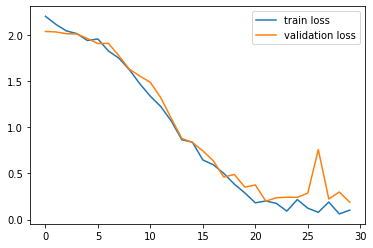

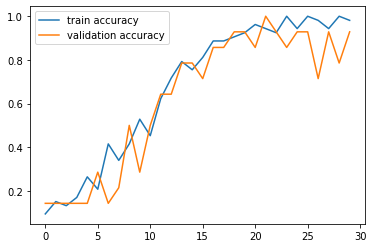

In [109]:
# plot the loss value
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy values
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [112]:
model.save('eye_model.h5')

In [ ]:
import cv2
import numpy as np

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load your pre-trained CNN model
def detect_eyes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
    return eyes

def estimate_gaze(eyes, image):
    height, width, _ = image.shape
    eye_centers = []
    eye_coordinates = []
    for (x, y, w, h) in eyes:
        center_x = x + w // 2
        center_y = y + h // 2
        eye_centers.append((center_x, center_y))

        # Draw bounding boxes around the eyes
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.circle(image, (center_x, center_y), 2, (0, 0, 255), 2)
    return eyes

# Define the desired dimensions
desired_width = 250
desired_height = 50

# Initialize the webcam
video_capture = cv2.VideoCapture(0)  # 0 represents the default webcam device

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = video_capture.read()
    eyes = detect_eyes(frame)
    eye_y = eyes[0][1]
    eye_x = eyes[0][0]
    eye_height = eyes[1][1]+eyes[1][3] - eyes[0][1]
    eye_width = eyes[1][0]+eyes[1][2] - eyes[0][0]

    

    # Flip the frame horizontally
    # frame = cv2.flip(frame, 1)

    # Define the ROI coordinates for the ye portion
    

    # Extract the eye ROI from the frame
    eye_roi = frame[eye_y:eye_y+eye_height, eye_x:eye_x+eye_width]

    # Resize the ROI to match the desired dimensions
    resized_roi = cv2.resize(eye_roi, (desired_width, desired_height))

    # Convert the ROI to RGB format
    resized_roi = cv2.cvtColor(resized_roi, cv2.COLOR_BGR2RGB)

    # Convert the ROI to numpy array
    resized_roi = np.asarray(resized_roi)

    # Expand dimensions to match the input shape of your CNN model
    resized_roi = np.expand_dims(resized_roi, axis=0)

    # Normalize pixel values
    resized_roi = resized_roi / 255.0

    # Pass the preprocessed ROI through your CNN model for prediction
    predictions = model.predict(resized_roi)
    predicted_class = np.argmax(predictions, axis=1)
    frame = estimate_gaze(eyes, frame)

    # Display the predicted class
    if predicted_class[0] == 1:
        print(folders[predicted_class[0]])
    # Display the frame with overlays or visual indicators of person detection
    cv2.imshow('Eye Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the windows
video_capture.release()
cv2.destroyAllWindows()


In [111]:
folders[1]

'bottom_right'